In [1]:
using DrWatson
@quickactivate "Doran_etal_2022"

using LinearAlgebra
using StatsPlots
theme(:default, grid=false, label="", tickdirection=:out)

In [2]:
pdir = plotsdir("3x3SVD_mathplots") |> mkpath

"/Users/ben/projects/Doran_etal_2022/plots/3x3SVD_mathplots"

In [3]:
plteigvals = map(0.:0.01:3.) do c
    # c = 0.
    C = [
        3 c c;
        c 3 3;
        c 3 3;
    ]
    eigvals(C)
end |> x->reduce(hcat, x) |> permutedims

301×3 Matrix{Float64}:
  0.0          3.0          6.0
 -6.66134e-16  2.99993      6.00007
  4.44089e-16  2.99973      6.00027
  8.88178e-16  2.9994       6.0006
 -4.44089e-16  2.99893      6.00107
 -1.9984e-15   2.99833      6.00167
  6.66134e-16  2.9976       6.0024
 -1.33227e-15  2.99674      6.00326
 -1.33227e-15  2.99574      6.00426
 -4.44089e-16  2.99461      6.00539
  ⋮                         
  1.32108e-15  0.106505     8.8935
 -1.76427e-15  0.0932098    8.90679
  7.90678e-16  0.0799095    8.92009
 -1.53318e-15  0.066604     8.9334
  1.26277e-16  0.0532934    8.94671
 -2.06208e-15  0.0399776    8.96002
  5.89337e-17  0.0266567    8.97334
  8.62157e-16  0.0133309    8.98667
 -1.28198e-16  1.28198e-16  9.0

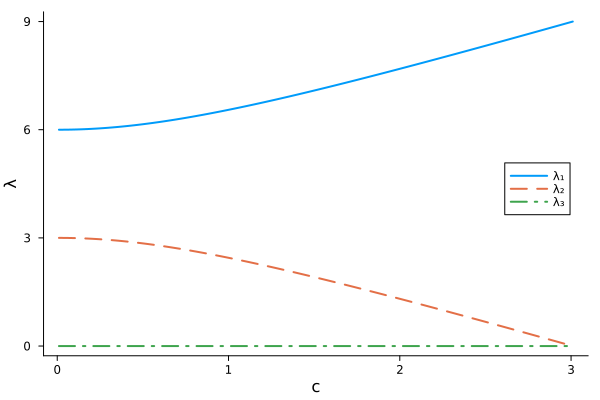

In [4]:
plot(plteigvals[:, [3,2,1]],
    label=["λ₁" "λ₂" "λ₃"],
    yticks=[0,3,6,9], 
    xticks=([0, 100, 200, 300], [0, 1, 2, 3]),
    xlabel="c",
    ylabel="λ",
    lw=2,
    linestyle=[:solid :dash :dashdot],
    # xflip=true,
    # size=(300, 200),
    legend=:right,
)

In [5]:
savefig(joinpath(pdir, "Eigvals_plot.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/3x3SVD_mathplots/Eigvals_plot.pdf"

In [6]:
using DataFrames

In [7]:
    c = 0.
    C = [
        3 c c;
        c 3 3;
        c 3 3;
    ]

3×3 Matrix{Float64}:
 3.0  0.0  0.0
 0.0  3.0  3.0
 0.0  3.0  3.0

In [8]:
eigen(C; sortby=-)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 6.0
 3.0
 3.552713678800501e-15
vectors:
3×3 Matrix{Float64}:
 0.0       1.0   0.0
 0.707107  0.0   0.707107
 0.707107  0.0  -0.707107

In [9]:
    c = 3.
    C = [
        3 c c;
        c 3 3;
        c 3 3;
    ]

3×3 Matrix{Float64}:
 3.0  3.0  3.0
 3.0  3.0  3.0
 3.0  3.0  3.0

In [15]:
vals, vecs = eigen(C; sortby=-)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 9.0
 5.329070518200751e-15
 0.0
vectors:
3×3 Matrix{Float64}:
 -0.57735  -0.408248   0.707107
 -0.57735  -0.408248  -0.707107
 -0.57735   0.816497   0.0

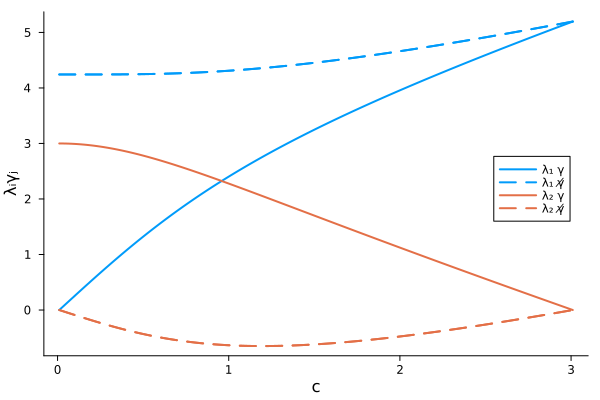

In [16]:
plteigvecs1 = map(0.:0.01:3.) do c
    a = 3.
    C = [
        a c c;
        c a a;
        c a a;
    ]
    # abs.(eigvecs(C; scale=true)[:, 3]) * eigvals(C; scale=false)[3]
    v = eigvecs(C; scale=true)[:, 3] * eigvals(C; scale=false)[3]
    sign(v[1]) >= 0 ? v : .-v
end |> stack;

plteigvecs2 = map(0.:0.01:3.) do c
    a = 3.
    C = [
        a c c;
        c a a;
        c a a;
    ]
    # abs.(eigvecs(C; scale=true)[:, 2]) * eigvals(C; scale=false)[2]
    v = eigvecs(C; scale=true)[:, 2] * eigvals(C; scale=false)[2]
    sign(v[1]) >= 0 ? v : .-v
end |> stack;

plot([0 0 0 0], 
    c=[1 1 2 2], 
    linestyle=[:solid :dash :solid :dash], 
    label=["λ₁ γ" "λ₁ γ̸" "λ₂ γ" "λ₂ γ̸"],
    xlabel="c",
    ylabel="λᵢγⱼ",
    legend=:right,
    xticks=([0, 100, 200, 300], [0, 1, 2, 3]),
    lw=2
)
plot!(plteigvecs1', c=1, lw=2, linestyle=[:solid :dash :dash])
plot!(plteigvecs2', c=2, lw=2, linestyle=[:solid :dash :dash])

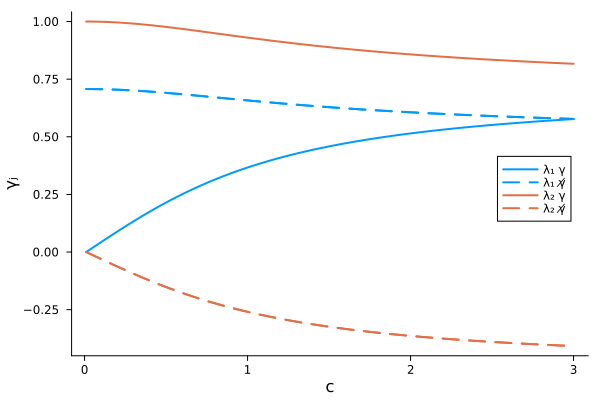

In [20]:
plteigvecs1 = map(0.:0.01:3.) do c
    a = 3.
    C = [
        a c c;
        c a a;
        c a a;
    ]
    # abs.(eigvecs(C; scale=true)[:, 3]) * eigvals(C; scale=false)[3]
    v = eigvecs(C; scale=true)[:, 3] #* eigvals(C; scale=false)[3]
    sign(v[1]) >= 0 ? v : .-v
end |> stack;

plteigvecs2 = map(0.:0.01:3.) do c
    a = 3.
    C = [
        a c c;
        c a a;
        c a a;
    ]
    # abs.(eigvecs(C; scale=true)[:, 2]) * eigvals(C; scale=false)[2]
    v = eigvecs(C; scale=true)[:, 2] #* eigvals(C; scale=false)[2]
    sign(v[1]) >= 0 ? v : .-v
end |> stack;

plot([0 0 0 0], 
    c=[1 1 2 2], 
    linestyle=[:solid :dash :solid :dash], 
    label=["λ₁ γ" "λ₁ γ̸" "λ₂ γ" "λ₂ γ̸"],
    xlabel="c",
    ylabel="γⱼ",
    legend=:right,
    xticks=([0, 100, 200, 300], [0, 1, 2, 3]),
    lw=2
)
plot!(plteigvecs1'[1:300,:], c=1, lw=2, linestyle=[:solid :dash :dash])
plot!(plteigvecs2'[1:300,:], c=2, lw=2, linestyle=[:solid :dash :dash])

In [22]:
savefig(joinpath(pdir, "EigVecsplot.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/3x3SVD_mathplots/EigVecsplot.pdf"

In [23]:
using Symbolics

In [24]:
@variables λ γ x₁ x₂ x₃

5-element Vector{Num}:
  λ
  γ
 x₁
 x₂
 x₃

In [ ]:
γ

In [28]:
C = [
    3 γ γ
    γ 3 3
    γ 3 3
]
charpoly = expand(det(λ*I - C))

λ^3 + 18λ - 9(λ^2) - 2λ*(γ^2)

In [30]:
# modular case
substitute(charpoly, γ=>0)

λ^3 + 18λ - 9(λ^2)

In [31]:
# related case
substitute(charpoly, γ=>1)

λ^3 + 16λ - 9(λ^2)

In [32]:
# similar case
substitute(charpoly, γ=>3)

λ^3 - 9(λ^2)

In [36]:
m = [
    1 1 0 0 1 0 
    0 0 1 1 1 0 
    0 0 1 1 1 0 
]
m * m'

3×3 Matrix{Int64}:
 3  1  1
 1  3  3
 1  3  3

In [19]:
plteigvecs1

3×301 Matrix{Float64}:
 0.0       0.00471389  0.00942683  0.0141379  …  0.57649  0.576921  0.57735
 0.707107  0.707099    0.707075    0.707036      0.57778  0.577565  0.57735
 0.707107  0.707099    0.707075    0.707036      0.57778  0.577565  0.57735

$$
\begin{align}
\det(M - \lambda I) &=& \begin{vmatrix}
    a^ta - \lambda & a^tb & a^tc  \\
    b^ta & b^tb - \lambda & b^tc  \\
    c^ta & c^tb & c^tc - \lambda  \\
\end{vmatrix} \\
&=& +(a^ta - \lambda) \left[(b^tb - \lambda)(c^tc - \lambda) - (c^tb)(b^tc) \right] \\
&&- (a^tb) \left[(b^ta)(c^tc - \lambda) - (c^ta)(b^tc) \right] \\
&&+ (a^tc) \left[(b^ta)(c^tb) - (c^ta)(b^tb - \lambda) \right]

\end{align}
$$

$$
\begin{align}
&+(3 - \lambda) \left[(3 - \lambda)(3 - \lambda) - (3)(3) \right] \\
&- (0) \left[(0)(3 - \lambda) - (0)(3) \right] \\
&+ (0) \left[(0)(3) - (0)(3- \lambda) \right]
\end{align}
$$

$$
\begin{align}
&+(3 - \lambda) \left[(3 - \lambda)(3 - \lambda) - (3)(3) \right] \\
&- (3) \left[(3)(3 - \lambda) - (3)(3) \right] \\
&+ (3) \left[(3)(3) - (3)(3- \lambda) \right]
\end{align}
$$


$$
\begin{align}
&+ (3 - \lambda)(3 - \lambda)(3 - \lambda) \\
&- (3 - \lambda)(3)(3) \\
&- (3)(3)(3 - \lambda) \\
&+ (3)(3)(3) \\
&+ (3)(3)(3) \\
&- (3)(3)(3- \lambda) \\
\end{align}
$$

$$
\begin{align}
&+(a^ta - \lambda) (b^tb - \lambda)(c^tc - \lambda) \\
&- (a^ta - \lambda)(c^tb)(b^tc) \\
&- (a^tb)(b^ta)(c^tc - \lambda) \\
&+ (a^tb)(c^ta)(b^tc) \\
&+ (a^tc)(b^ta)(c^tb) \\
&- (a^tc)(c^ta)(b^tb - \lambda)\\
\end{align}
$$

$$
\begin{align}
&+(a^ta - \lambda) (b^tb - \lambda)(c^tc - \lambda) \\
&- (a^ta - \lambda)(c^tb)(b^tc) \\
&- (a^tb)(b^ta)(c^tc - \lambda) \\
&+ (a^tb)(c^ta)(b^tc) \\
&+ (a^tc)(b^ta)(c^tb) \\
&- (a^tc)(c^ta)(b^tb - \lambda)\\
\end{align}
$$

In [5]:
f(γ, λ, ϵ) = begin
    -γ * (1 + 1) / (3 - λ + ϵ)
end

f (generic function with 1 method)

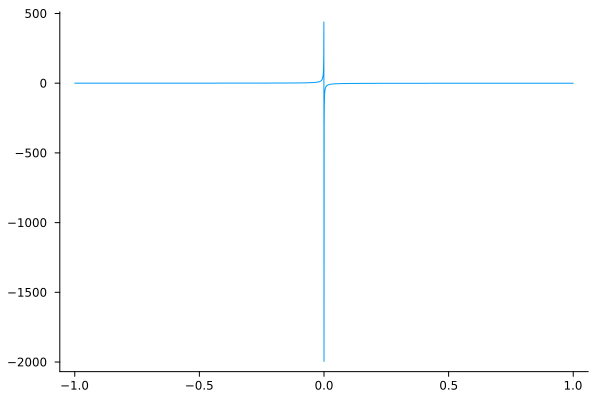

In [21]:
plot(x -> f(0.1, 3, x), -1, 1)